In [411]:
import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

In [412]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting and reduce training time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [413]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Images and Labels

In [414]:
img_size = (128, 128, 3)
basePath = '/content/drive/MyDrive/Colab Notebooks/Project_4/'
img_list = os.listdir(basePath + "Images/")

In [415]:
img_labels = []
for img in img_list:
  if 'clean' in img:
    img_labels.append(0)
  else:
    img_labels.append(1)

In [416]:
# saved images and labels to metadta.csv file
pd.DataFrame(zip(img_list,img_labels), columns=['filename', 'label']).to_csv(basePath + 'metadata.csv', index=False)

In [417]:
# building a list with images
images = []
for img in img_list:
  img = cv2.imread(basePath + 'Images/' + img, cv2.IMREAD_COLOR)
  images.append(cv2.resize(img, img_size[0:2])[:, :, ::-1])

In [418]:
len(images)

237

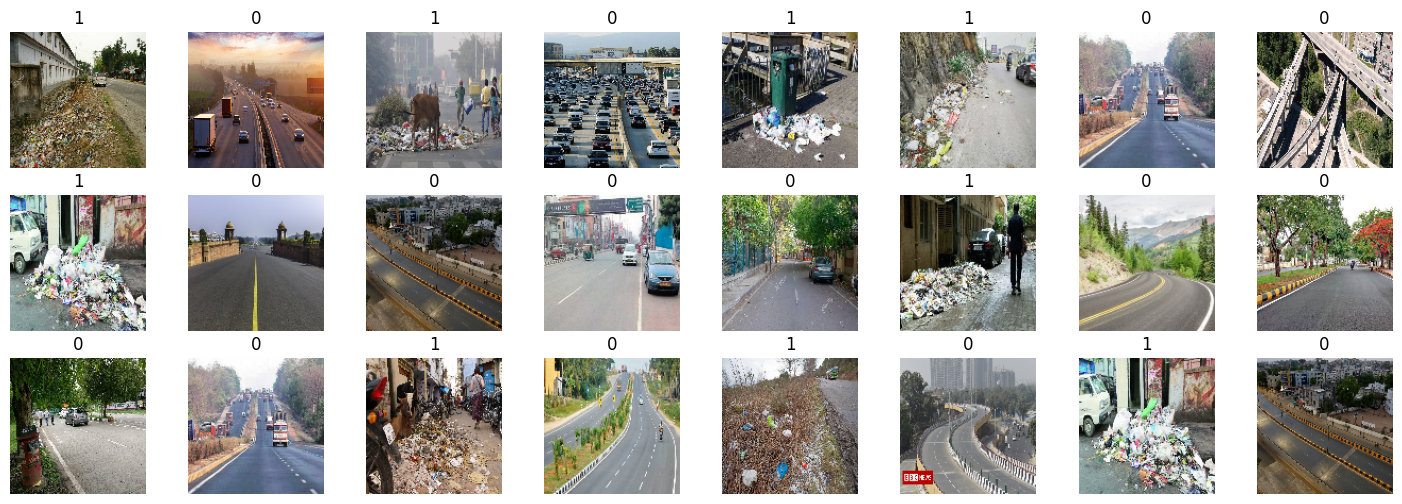

In [422]:
# Run model on image
# Ensure images is not empty before proceeding
plt.figure(figsize=(18, 6))
indexes = np.random.randint(len(images), size=24)
for i,x in enumerate(indexes):
  plt.subplot(3, 8, i+1)
  plt.title(img_labels[x])
  plt.imshow(images[x])
  plt.axis('off')

In [423]:
# Calculate accuracy
accuracy = accuracy_score(y_true[:len(y_pred)], y_pred)
print(f"Overall accuracy: {accuracy:.4f}")

Overall accuracy: 0.6250


In [329]:
#data shape
# Check shapes of individual images
for i, img in enumerate(images):
  print(f"Shape of image {i}: {img.shape}")

# Find the common shape (e.g., minimum height and width)
min_height = min(img.shape[0] for img in images)
min_width = min(img.shape[1] for img in images)

# Resize images to the common shape
resized_images = [cv2.resize(img, (min_width, min_height)) for img in images]

# Create NumPy array from resized images
image_array = np.array(resized_images)

# Print the shape of the array
print(image_array.shape)

Shape of image 0: (590, 393, 3)
Shape of image 1: (480, 640, 3)
Shape of image 2: (664, 1000, 3)
Shape of image 3: (413, 660, 3)
Shape of image 4: (576, 1024, 3)
Shape of image 5: (422, 759, 3)
Shape of image 6: (354, 800, 3)
Shape of image 7: (448, 800, 3)
Shape of image 8: (2968, 3968, 3)
Shape of image 9: (390, 600, 3)
Shape of image 10: (900, 1200, 3)
Shape of image 11: (183, 275, 3)
Shape of image 12: (357, 635, 3)
Shape of image 13: (720, 1280, 3)
Shape of image 14: (600, 800, 3)
Shape of image 15: (918, 1294, 3)
Shape of image 16: (600, 780, 3)
Shape of image 17: (390, 600, 3)
Shape of image 18: (258, 345, 3)
Shape of image 19: (533, 800, 3)
Shape of image 20: (1355, 1969, 3)
Shape of image 21: (400, 600, 3)
Shape of image 22: (489, 728, 3)
Shape of image 23: (1536, 2048, 3)
Shape of image 24: (573, 766, 3)
Shape of image 25: (640, 966, 3)
Shape of image 26: (358, 630, 3)
Shape of image 27: (267, 480, 3)
Shape of image 28: (422, 759, 3)
Shape of image 29: (584, 963, 3)
Shape of 

In [330]:
# split data into training and testing
X_train, X_val, y_train, y_val = train_test_split(images, img_labels, test_size=0.1, random_state=42)

In [331]:
#data shape
# Check shapes of individual images
for i, img in enumerate(images):
  print(f"Shape of image {i}: {img.shape}")

# Find the common shape (e.g., minimum height and width)
min_height = min(img.shape[0] for img in images)
min_width = min(img.shape[1] for img in images)

# Resize images to the common shape
resized_images = [cv2.resize(img, (min_width, min_height)) for img in images]

# Create NumPy array from resized images
image_array = np.array(resized_images)

# Print the shape of the array
print(image_array.shape)

# split data into training and testing
X_train, X_val, y_train, y_val = train_test_split(image_array, img_labels, test_size=0.1, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)


Shape of image 0: (590, 393, 3)
Shape of image 1: (480, 640, 3)
Shape of image 2: (664, 1000, 3)
Shape of image 3: (413, 660, 3)
Shape of image 4: (576, 1024, 3)
Shape of image 5: (422, 759, 3)
Shape of image 6: (354, 800, 3)
Shape of image 7: (448, 800, 3)
Shape of image 8: (2968, 3968, 3)
Shape of image 9: (390, 600, 3)
Shape of image 10: (900, 1200, 3)
Shape of image 11: (183, 275, 3)
Shape of image 12: (357, 635, 3)
Shape of image 13: (720, 1280, 3)
Shape of image 14: (600, 800, 3)
Shape of image 15: (918, 1294, 3)
Shape of image 16: (600, 780, 3)
Shape of image 17: (390, 600, 3)
Shape of image 18: (258, 345, 3)
Shape of image 19: (533, 800, 3)
Shape of image 20: (1355, 1969, 3)
Shape of image 21: (400, 600, 3)
Shape of image 22: (489, 728, 3)
Shape of image 23: (1536, 2048, 3)
Shape of image 24: (573, 766, 3)
Shape of image 25: (640, 966, 3)
Shape of image 26: (358, 630, 3)
Shape of image 27: (267, 480, 3)
Shape of image 28: (422, 759, 3)
Shape of image 29: (584, 963, 3)
Shape of 

In [332]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)


In [333]:
# Creating initial model
from tensorflow.keras.models import Sequential # Import the Sequential class from tensorflow.keras.models
from tensorflow.keras.layers import Flatten, Dense #Import Flatten and Dense

nn=Sequential()
nn.add(Flatten())
nn.add(Dense(128,activation='relu'))
nn.add(Dense(128,activation='relu'))
nn.add(Dense(1,activation='sigmoid'))
# Compile the model
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [334]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (213, 178, 275, 3)
y_train shape: (213,)
X_val shape: (24, 178, 275, 3)
y_val shape: (24,)


In [424]:
fit_model = nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

train_accuracy = fit_model.history['accuracy']
val_accuracy = fit_model.history['val_accuracy']

print('Final Training Accuracy:', train_accuracy[-1])
print('Final Validation Accuracy:', val_accuracy[-1])

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.6714 - loss: 367.2127 - val_accuracy: 0.6250 - val_loss: 689.0755
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.6158 - loss: 333.0579 - val_accuracy: 0.3750 - val_loss: 1179.8973
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.6468 - loss: 321.2354 - val_accuracy: 0.5833 - val_loss: 452.0775
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.7659 - loss: 76.6850 - val_accuracy: 0.4583 - val_loss: 333.8687
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.9104 - loss: 25.3907 - val_accuracy: 0.4583 - val_loss: 391.0187
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.8931 - loss: 44.3832 - val_accuracy: 0.5000 - val_loss: 370.3582
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.7690 - loss: 110.0729 - val_accuracy: 0.4167 - val_loss: 823.9739
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 490ms/step - accuracy: 0.6849 - loss: 177.4029 - val_

In [126]:
print('Final Training Accuracy:', train_accuracy[-1])
print('Final Validation Accuracy:', val_accuracy[-1])

Final Training Accuracy: 0.8450704216957092
Final Validation Accuracy: 0.75


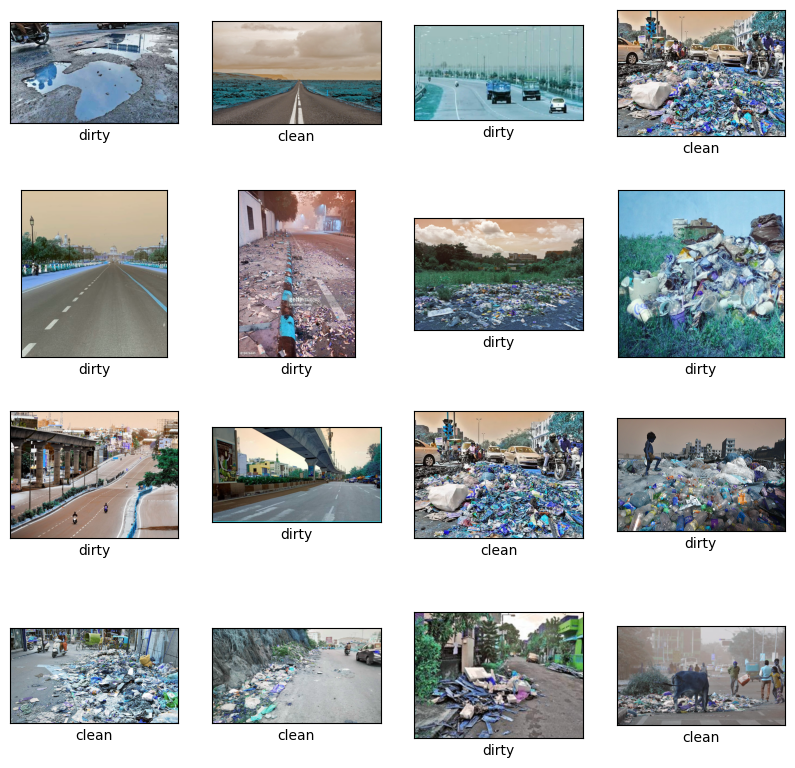

In [425]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Ensure the 'images' array is populated with your image data
# Example: Load images from a directory
!pip install opencv-python
import cv2
images = []
image_folder = '/tmp/input/Images/Images' # Replace with the actual path to your images
for filename in os.listdir(image_folder):
    img = cv2.imread(os.path.join(image_folder,filename))
    if img is not None:
        images.append(img)

for x in range(4):
    for y in range(4):
        # Check if 'images' is not empty before accessing elements
        if images:
            i = randint(0, len(images) - 1) # Ensure i is within the valid index range

            axs[x][y].imshow(images[i])

            # delete x and y ticks and set x label as picture label
            axs[x][y].set_xticks([])
            axs[x][y].set_yticks([])

            # Check if labels array is not empty and has enough elements
            if labels.size != 0 and i < len(labels): # Check if 'labels' is not empty using its size
                axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()

The first example image is this clean street above. We will plug this into the classifier to see what objects it detects.

In [202]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # Import numpy for array manipulation


# Ensure demoImage has the correct shape (128, 128, 3) and normalize it
demoImage_resized = tf.image.resize(demoImage, [128, 128])  # Resize the image

# Check if the image is already normalized; normalize to [0, 1] if needed
if demoImage_resized.numpy().max() > 1:
    demoImage_resized = demoImage_resized / 255.0  # Normalize to [0, 1]

# Remove any unnecessary dimensions to ensure (128, 128, 3)
demoImage_resized = tf.squeeze(demoImage_resized)

# Add the batch dimension to get the correct shape for the model (1, 128, 128, 3)
demoImage_resized = tf.expand_dims(demoImage_resized, axis=0)

# Run the model on the image
predictions = model(demoImage_resized, training=False)

# Check if the model output needs to be flattened
if len(predictions.shape) > 2:
    predictions = tf.keras.layers.Flatten()(predictions)

# Then apply softmax to get probabilities
probabilities = tf.nn.softmax(predictions).numpy()

# Print the shape of the probabilities to help with debugging
print(f"Shape of probabilities: {probabilities.shape}") # This will print the shape of probabilities

# Check the model's output shape and handle binary classification correctly
if probabilities.shape[1] == 2:  # Binary classification case (two output probabilities)
    pred_class_index = 0 if probabilities[0][0] >= 0.5 else 1
    predicted_class = 'clean' if pred_class_index == 0 else 'dirty'
    probability = probabilities[0][pred_class_index]  # Probability of the predicted class
else:
    # Handle multi-class classification here if needed
    pred_class_index = probabilities.argmax()
    # Assuming you have a list of class names
    # predicted_class = class_names[pred_class_index]
    # probability = probabilities[0][pred_class_index]
    raise ValueError(f'Unexpected output shape from the model: {probabilities.shape}')

# Print the predicted class and its probability
print(f'Predicted class: {predicted_class}, Probability: {probability:.4f}')

# Display the original image (after ensuring it's normalized)
plt.imshow(tf.squeeze(demoImage))  # Remove the batch dimension to display
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

# Check if the image is too dark
if demoImage.numpy().max() > 1:
    print(f'Image pixel values range after processing:')
    print(f'Min value: {demoImage.numpy().min()}, Max value: {demoImage.numpy().max()}')
else:
    print(f'Image pixel values range after processing (normalized):')
    print(f'Min value: {demoImage.numpy().min()}, Max value: {demoImage.numpy().max()}')
# Print the model summary to understand its input and output shapes
model.summary()

# Check the shape of the first layer of the model
print(f"Input shape of the first layer: {model.layers[0].input_shape}")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input [[[[0.93492573 0.0107892  0.47721955]
   [0.29302993 0.1513083  0.74926716]
   [0.632426   0.33425117 0.37341532]
   ...
   [0.23093125 0.40142497 0.31050968]
   [0.01537626 0.9689861  0.7250605 ]
   [0.6641488  0.67518157 0.54230726]]

  [[0.03623626 0.24094406 0.5848653 ]
   [0.17659974 0.9172518  0.13983046]
   [0.20748685 0.10794839 0.34234354]
   ...
   [0.11224283 0.12408794 0.352416  ]
   [0.9487761  0.67150307 0.4064772 ]
   [0.36844018 0.33446893 0.33797878]]

  [[0.16706233 0.38362372 0.47871298]
   [0.8384081  0.09059271 0.57740176]
   [0.9897423  0.303116   0.6413386 ]
   ...
   [0.7545664  0.30126753 0.74802476]
   [0.10236362 0.21393807 0.40552443]
   [0.39274147 0.7518987  0.44759998]]

  ...

  [[0.6674115  0.506129   0.07028047]
   [0.3368443  0.18026064 0.39924476]
   [0.07326975 0.5174475  0.78920865]
   ...
   [0.8285852  0.6434798  0.1659125 ]
   [0.9165778  0.48022553 0.6829504 ]
   [0.5405534  0.90911245 0.8418491 ]]

  [[0.36098957 0.76488024 0.6504735 ]
   [0.7621818  0.45369694 0.56002736]
   [0.8139533  0.1900834  0.36274403]
   ...
   [0.78320575 0.46866253 0.42775598]
   [0.76042765 0.12531435 0.27737024]
   [0.19167627 0.47906393 0.2077498 ]]

  [[0.5740188  0.86634797 0.43350676]
   [0.89511764 0.08128233 0.44633996]
   [0.48737386 0.8721329  0.8454888 ]
   ...
   [0.56482714 0.06652564 0.5128576 ]
   [0.36755013 0.1443097  0.6366134 ]
   [0.00609892 0.09452941 0.76030916]]]]. Expected shape (None, 4), but input has incompatible shape (1, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None

In [204]:
# Print the model summary to understand its input and output shapes
model.summary()

# Check the shape of the first layer of the model
#print(f"Input shape of the first layer: {model.layers[0].input_shape}") # This line caused the error because Dense layers do not have an input_shape attribute.
print(f"Input shape of the first layer: {model.layers[0].input.shape}")

# Access the input shape from the model itself
print(f"Input shape of the model: {model.input_shape}")

# Add code to reshape the image to match the expected input shape
demoImage_resized = tf.reshape(demoImage_resized, [1, 4]) # Reshape to (1, 4)

# Now continue with the rest of your code
predictions = model(demoImage_resized, training=False)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 4)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

Input shape of the first layer: (None, 4)
Input shape of the model: (None, 4)


InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 49152 values, but the requested shape has 4 [Op:Reshape]

In [426]:
pred_class_index = probabilities.argmax()
print(f'Predicted class index: {pred_class_index}')

Predicted class index: 0


In [427]:
# Check if the image is too dark
print(f'Image pixel values range after processing:')
print(f'Min value: {tf.reduce_min(demoImage)}, Max value: {tf.reduce_max(demoImage)}')

Image pixel values range after processing:
Min value: 8.309043884277344, Max value: 240.2432098388672


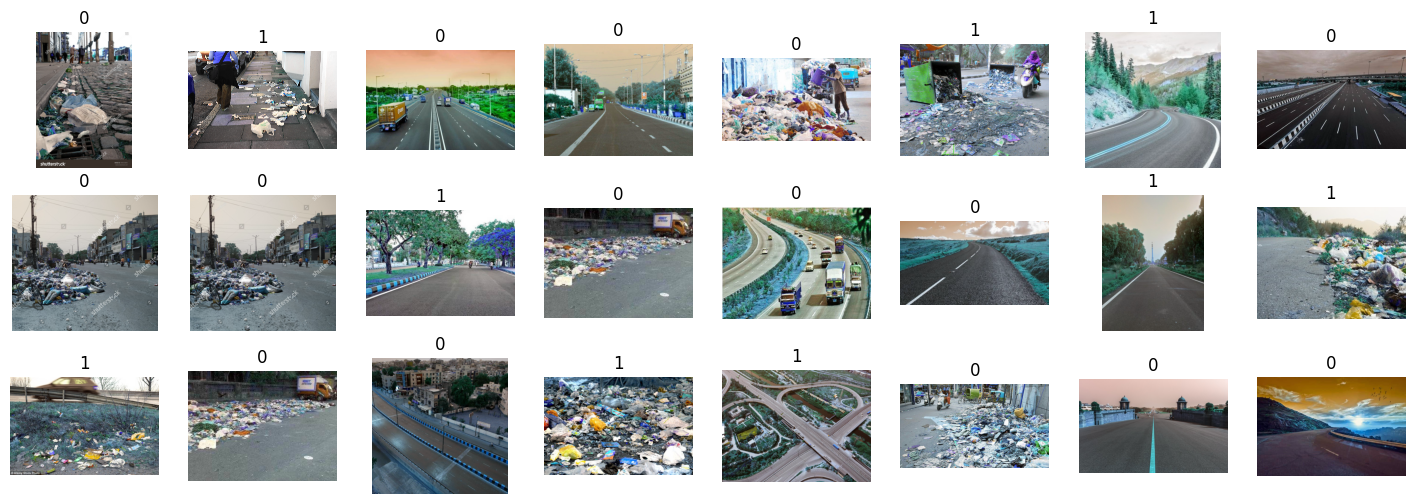

In [428]:
# Run model on image
# Ensure images is not empty before proceeding
plt.figure(figsize=(18, 6))
indexes = np.random.randint(len(images), size=24)
for i,x in enumerate(indexes):
  plt.subplot(3, 8, i+1)
  plt.title(img_labels[x])
  plt.imshow(images[x])
  plt.axis('off')

In [429]:
train_accuracy = fit_model.history['accuracy']
val_accuracy = fit_model.history['val_accuracy']

print('Final Training Accuracy:', train_accuracy[-1])
print('Final Validation Accuracy:', val_accuracy[-1])

Final Training Accuracy: 0.9389671087265015
Final Validation Accuracy: 0.4583333432674408


In [430]:


import tensorflow.keras as keras
from tensorflow.keras import layers
# Import the keras library from tensorflow

model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to ensure it's correctly loaded
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [431]:
# Define the model
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1", input_shape=(4,)),
        # Input shape is required for the first layer
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

# Print the model summary to see parameter and output shapes
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 4)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [212]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the model handle (example from TensorFlow Hub MobileNetV2)
model_handle = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Load the pre-trained model from TensorFlow Hub
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    hub.KerasLayer(model_handle, trainable=False),  # Load model from TF Hub
    tf.keras.layers.Dense(2, activation='softmax')  # Binary classification ('clean', 'dirty')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to ensure it's correctly loaded
model.summary()

# Example to test the model with an image
demoImage = ...  # Load your image here and resize to (128, 128)

# Preprocess demoImage (resize and normalize)
demoImage_resized = tf.image.resize(demoImage, [128, 128]) / 255.0
demoImage_resized = tf.expand_dims(demoImage_resized, axis=0)  # Add batch dimension

# Run the model on the image
probabilities = model.predict(demoImage_resized)

# Display the prediction
predicted_class = 'dirty' if probabilities[0][1] >= 0.5 else 'clean'
print(f'Predicted class: {predicted_class}, Probability of dirty: {probabilities[0][1]:.4f}')

# Show the image
plt.imshow(tf.squeeze(demoImage))
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7f2b91da7370> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

Image shape: (224, 224, 3)
Image dtype: <dtype: 'float32'>


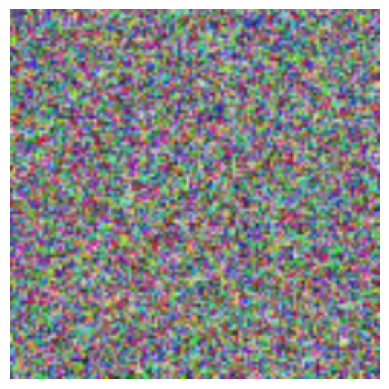

In [432]:
# Check the shape and type of demoImage
print(f"Image shape: {demoImage.shape}")
print(f"Image dtype: {demoImage.dtype}")

# If the image is not normalized (i.e., values are in the range 0-255), normalize it
if tf.reduce_max(demoImage) > 1: # Use tf.reduce_max() to get the max value of the tensor
    demoImage = demoImage / 255.0

# Check if demoImage has an extra batch dimension (shape should be (height, width, channels))
if len(demoImage.shape) == 4:
    print("Removing batch dimension...")
    demoImage = demoImage[0]  # Remove the batch dimension

# Check for NaN or invalid values
if np.isnan(demoImage).any():
    print("Warning: Image contains NaN values!")

# Now plot the image using matplotlib
plt.imshow(demoImage)
plt.axis('off')  # Hide axes
plt.show()

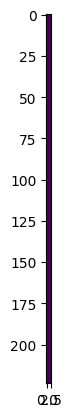

In [433]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'demoImage' is your image data
demoImage = demoImage / 255.0
demoImage = np.clip(demoImage, 0, 1)

# Convert to PIL Image and then back to numpy array
img = Image.fromarray((demoImage[0] * 255).astype(np.uint8))
demoImage = np.array(img) / 255.0

plt.imshow(demoImage)
plt.show()

In [434]:
print(demoImage)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

In [435]:
# Convert TensorFlow tensor to a NumPy array
#demoImage_np = demoImage.numpy()  # Convert EagerTensor to NumPy array
# The variable demoImage is already a numpy array. Remove this line.
demoImage_np = demoImage

# Check the shape and type of demoImage
print(f"Image shape: {demoImage_np.shape}")
print(f"Image dtype: {demoImage_np.dtype}")

# If the image is not normalized (i.e., values are in the range 0-255), normalize it
if demoImage_np.max() > 1:
    print("Normalizing image...")
    demoImage_np = demoImage_np / 255.0

# Clip the image values to ensure they're within [0, 1] range for floats
demoImage_np = np.clip(demoImage_np, 0.0, 1.0)

# Now plot the image using matplotlib
plt.imshow(demoImage_np)
plt.axis('off')  # Hide axes
plt.show()

Image shape: (224, 3)
Image dtype: float64


> Now lets see what happens when we feed it a more chaotic image, like one of the 'dirty' images that we have from our data.

In [436]:
# Function to show the image (assuming you have this implemented)
def show_image(image, title):
    # Squeeze the image to remove the batch dimension
    image = np.squeeze(image)

    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [135]:
!pip show tensorflow
!pip show tensorflow-hub

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, protobuf, tf-keras
Required-by: 


In [437]:
model_handle = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [438]:
# Define IMAGE_SIZE
IMAGE_SIZE = (224, 224)

# Model handle from TensorFlow Hub
model_handle = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Fine-tuning flag
do_fine_tuning = False

# Correct class names: 'clean' and 'dirty'
class_names = ['clean', 'dirty']

# Create the input layer explicitly with shape and dtype
inputs = tf.keras.Input(shape=IMAGE_SIZE + (3,), dtype=tf.float32)

# Load the pre-trained MobileNetV2 model from TensorFlow Hub
hub_layer = hub.KerasLayer(model_handle, trainable=do_fine_tuning)

# Pass the input through the hub layer
# Wrap the hub_layer call within a Lambda layer to force eager execution
hub_output = tf.keras.layers.Lambda(lambda x: hub_layer(x))(inputs)

# Add a dropout layer to prevent overfitting
dropout_layer = tf.keras.layers.Dropout(rate=0.2)(hub_output)

# Define the output layer with the correct number of classes (2 classes)
output_layer = tf.keras.layers.Dense(len(class_names), activation='softmax')(dropout_layer)

# Build the model using the Functional API
model = tf.keras.Model(inputs=inputs, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Test the model with a dummy input
dummy_input = tf.random.normal([1, 224, 224, 3])  # Simulate one image of size (224, 224, 3)
output = model(dummy_input)
print("Model output shape:", output.shape)

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

Model output shape: (1, 2)


In [440]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the model handle (example from TensorFlow Hub MobileNetV2)
model_handle = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Load the pre-trained model from TensorFlow Hub
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    hub.KerasLayer(model_handle, trainable=False),  # Load model from TF Hub
    tf.keras.layers.Dense(2, activation='softmax')  # Binary classification ('clean', 'dirty')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to ensure it's correctly loaded
model.summary()

# Example to test the model with an image
demoImage = ...  # Load your image here and resize to (128, 128)

# Preprocess demoImage (resize and normalize)
demoImage_resized = tf.image.resize(demoImage, [128, 128]) / 255.0
demoImage_resized = tf.expand_dims(demoImage_resized, axis=0)  # Add batch dimension

# Run the model on the image
probabilities = model.predict(demoImage_resized)

# Display the prediction
predicted_class = 'dirty' if probabilities[0][1] >= 0.5 else 'clean'
print(f'Predicted class: {predicted_class}, Probability of dirty: {probabilities[0][1]:.4f}')

# Show the image
plt.imshow(tf.squeeze(demoImage))
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7f2b7dcb4190> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [441]:
model_name = "mobilenetv2-035-128"

#NOTICE HOW WE ARE USING FEATURE VECTOR FOR THIS STEP AND NOT CLASSIFIER
model_handle_map = {
  "mobilenetv2-035-128": "/kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2",
}

model_image_size_map = {
  "mobilenetv2-035-128": 128,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 128)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 4

Selected model: mobilenetv2-035-128 : /kaggle/input/mobilenet-v2/tensorflow2/035-128-feature-vector/2
Input size (128, 128)


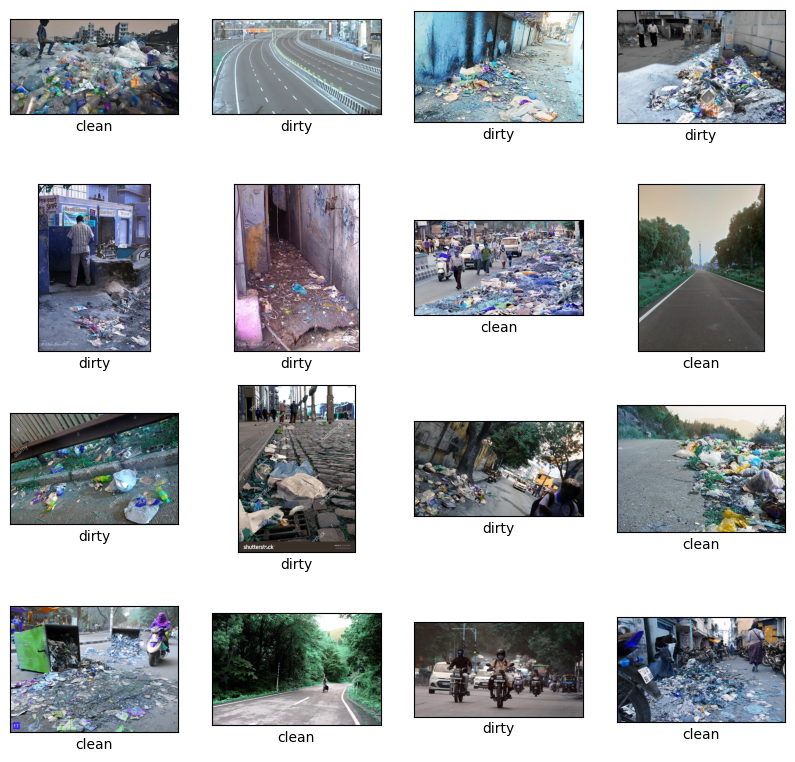

In [442]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))

        axs[x][y].imshow(images[i])

        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()

Dataset extracted to /tmp/input


labels dataframe: 
         filename  label
0    dirty_2.jpg      1
1   clean_36.jpg      0
2   clean_31.jpg      0
3   dirty_69.jpg      1
4  clean_113.jpg      0 


2 classes: ('clean', 'dirty')
image size: (128, 128, 3)
/tmp/input/Images/Images/dirty_2.jpg
/tmp/input/Images/Images/clean_36.jpg
/tmp/input/Images/Images/clean_31.jpg
/tmp/input/Images/Images/dirty_69.jpg
/tmp/input/Images/Images/clean_113.jpg
/tmp/input/Images/Images/clean_102.jpg
/tmp/input/Images/Images/clean_43.jpg
/tmp/input/Images/Images/dirty_27.jpg
/tmp/input/Images/Images/dirty_53.jpg
/tmp/input/Images/Images/clean_55.jpg
/tmp/input/Images/Images/clean_28.jpg
/tmp/input/Images/Images/dirty_55.jpg
/tmp/input/Images/Images/clean_103.jpg
/tmp/input/Images/Images/dirty_31.jpg
/tmp/input/Images/Images/dirty_22.jpg
/tmp/input/Images/Images/dirty_118.jpg
/tmp/input/Images/Images/clean_62.jpg
/tmp/input/Images/Images/clean_51.jpg
/tmp/input/Images/Images/dirty_66.jpg


<ipython-input-443-8b99a0361b7b>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_path = os.path.join(images_path, image[0])
<ipython-input-443-8b99a0361b7b>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[image[1]] = 1


/tmp/input/Images/Images/clean_61.jpg
/tmp/input/Images/Images/clean_99.jpg
/tmp/input/Images/Images/dirty_92.jpg
/tmp/input/Images/Images/dirty_4.jpg
/tmp/input/Images/Images/clean_70.jpg
/tmp/input/Images/Images/dirty_17.jpg
/tmp/input/Images/Images/clean_54.jpg
/tmp/input/Images/Images/dirty_52.jpg
/tmp/input/Images/Images/dirty_11.jpg
/tmp/input/Images/Images/clean_81.jpg
/tmp/input/Images/Images/dirty_34.jpg
/tmp/input/Images/Images/dirty_107.jpg
/tmp/input/Images/Images/dirty_15.jpg
/tmp/input/Images/Images/clean_94.jpg
/tmp/input/Images/Images/dirty_90.jpg
/tmp/input/Images/Images/dirty_18.jpg
/tmp/input/Images/Images/dirty_60.jpg
/tmp/input/Images/Images/dirty_74.jpg
/tmp/input/Images/Images/clean_71.jpg
/tmp/input/Images/Images/dirty_121.jpg
/tmp/input/Images/Images/dirty_35.jpg
/tmp/input/Images/Images/dirty_91.jpg
/tmp/input/Images/Images/dirty_49.jpg
/tmp/input/Images/Images/clean_8.jpg
/tmp/input/Images/Images/dirty_124.jpg
/tmp/input/Images/Images/dirty_37.jpg
/tmp/input/

IndexError: index 237 is out of bounds for axis 0 with size 237

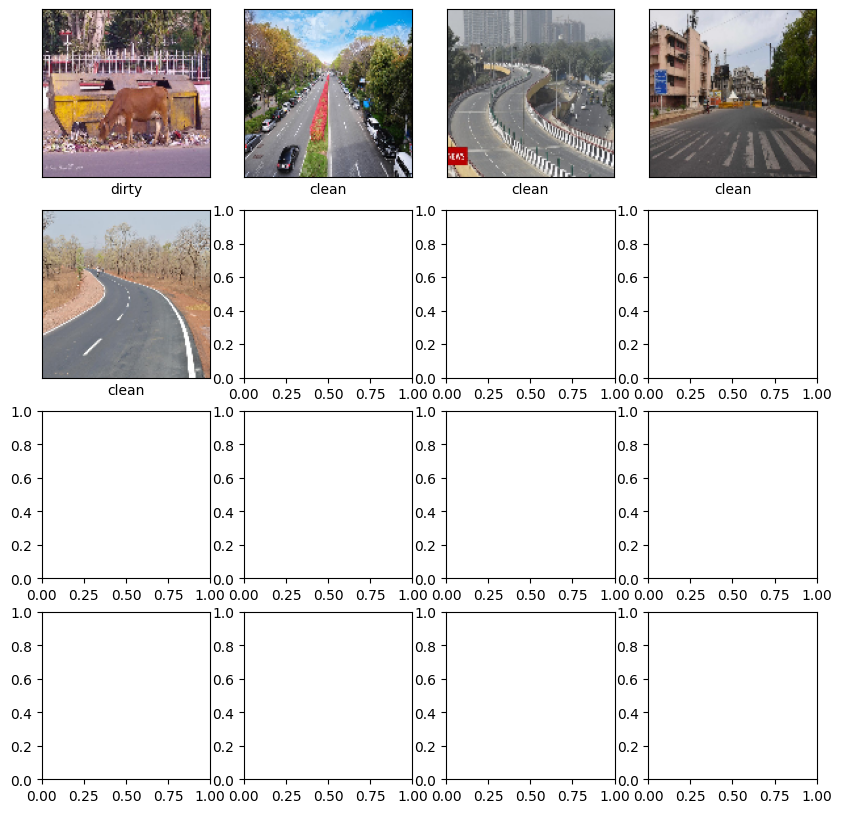

In [443]:

# Define paths
KAGGLE_INPUT_PATH = '/tmp/input'  # A writable directory for the dataset
os.makedirs(KAGGLE_INPUT_PATH, exist_ok=True)

# Use Kaggle API to download the dataset
os.system(f'kaggle datasets download -d faizalkarim/cleandirty-road-classification -p {KAGGLE_INPUT_PATH}')

# Find and unzip the downloaded file
dataset_zip = os.path.join(KAGGLE_INPUT_PATH, 'cleandirty-road-classification.zip')
if os.path.exists(dataset_zip):
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall(KAGGLE_INPUT_PATH)
    print(f'Dataset extracted to {KAGGLE_INPUT_PATH}')
else:
    print('Dataset not found. Check your download path or Kaggle API call.')
images_path = '/tmp/input/Images/Images/'

# Load the CSV file containing labels
labels_df = pd.read_csv('/tmp/input/metadata.csv')

print('\n\nlabels dataframe: \n', labels_df.head(), '\n\n')

class_names = ('clean', 'dirty')
num_classes = len(class_names)

img_size = (128, 128, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


labels = []
images = []
for image in labels_df.iloc:
    # Construct the full image path
    img_path = os.path.join(images_path, image[0])

    # Print image path to check if it exists
    print(img_path)

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    # Check if the image was loaded correctly
    if img is not None:
        images.append(np.asarray(cv2.resize(img, img_size[0:2])[:, :, ::-1]))

        # labels will be in the form of a vector: [0, 1] or [1, 0]
        label = np.zeros(num_classes)
        label[image[1]] = 1
        labels.append(label)
    else:
        print(f"Failed to load image: {img_path}")

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

# DEFINE TRAIN/TEST SPLIT
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))

        axs[x][y].imshow(images[i])

        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()

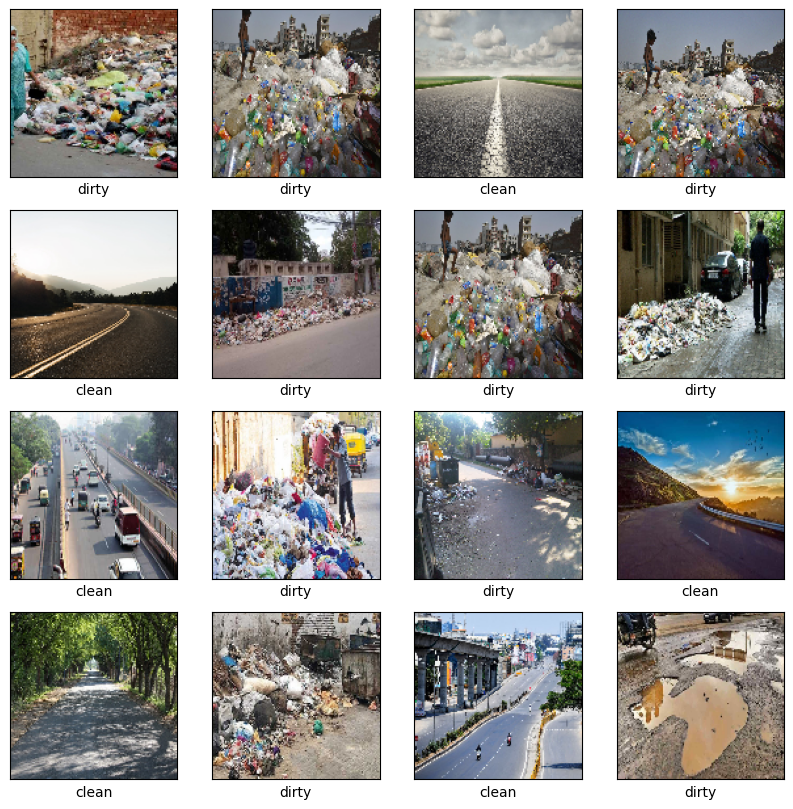

In [444]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        # Generate a random index within the valid range
        i = randint(0, len(images) - 1)

        axs[x][y].imshow(images[i])

        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])

plt.show()

In [445]:
# Print the accuracy from the last epoch
print("Overall Accuracy:", history.history['accuracy'][-1])

# or

print("Overall val_accuracy:", history.history['val_accuracy'][-1])

Overall Accuracy: 0.8450704216957092
Overall val_accuracy: 0.75


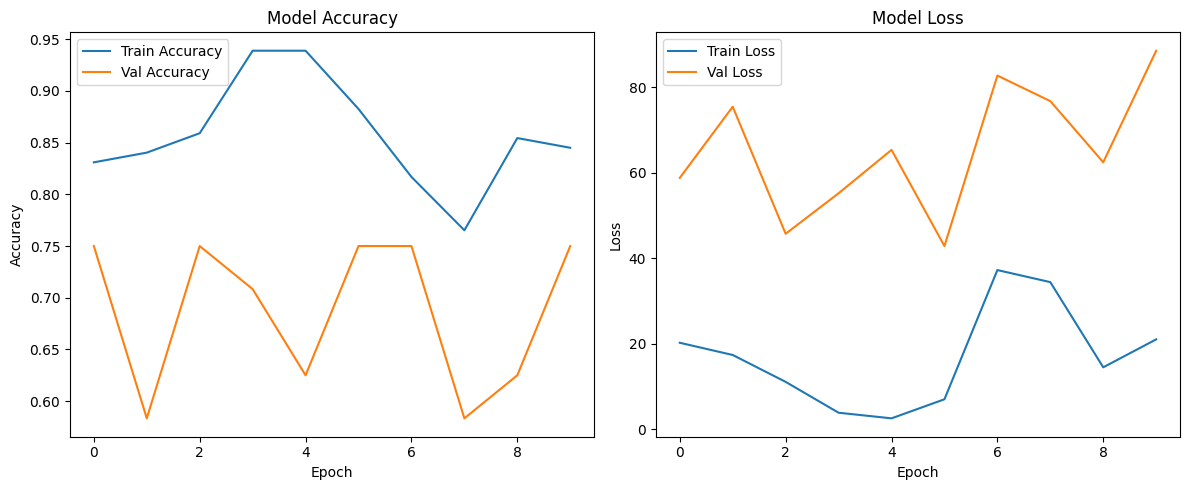

In [446]:
# Assuming 'history' is the result of model.fit(), which contains training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Display the charts
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss charts
plot_training_history(history)

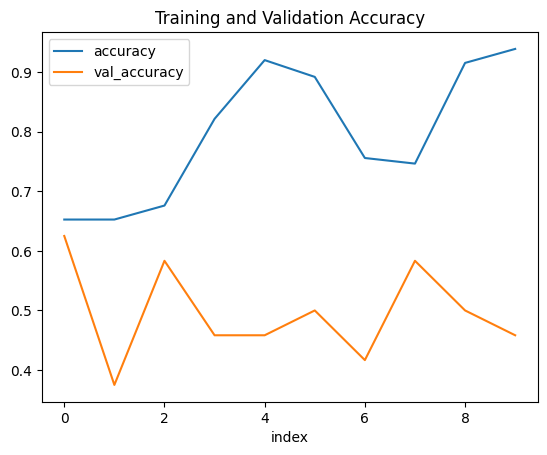

In [447]:
pd.DataFrame(fit_model.history).reset_index().plot(x='index', y=['accuracy', 'val_accuracy']);
title = 'Training and Validation Accuracy'
plt.title(title);


In [448]:
# Print the accuracy from the last epoch
print("Overall Accuracy:", history.history['accuracy'][-1])

# or

print("Overall val_accuracy:", history.history['val_accuracy'][-1])

Overall Accuracy: 0.8450704216957092
Overall val_accuracy: 0.75


In [449]:
print(y_train[:100])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [450]:
y_train.shape

(213, 2)

In [451]:
y_val[0]

array([0., 1.])

In [452]:
# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}.keras') # Added .keras extension

## Compile and Train Model

In [480]:
# DEFINE TRAIN/TEST SPLIT
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

# Check for inconsistent image shapes in X_train
shapes = [img.shape for img in X_train]
if len(set(shapes)) > 1:
    print("Inconsistent image shapes found in X_train:")
    for shape in set(shapes):
        print(f"- {shape}")
    # Resize images to a consistent size
    from PIL import Image # Import the Image module from PIL
    target_size = (128, 128) # Define the desired target size
    X_train = [np.array(Image.fromarray(img).resize(target_size)) for img in X_train] # Resize images in X_train
    X_val = [np.array(Image.fromarray(img).resize(target_size)) for img in X_val] # Resize images in X_val


# Convert X_train and X_val to NumPy arrays (if shapes are consistent)
X_train = np.array(X_train)
X_val = np.array(X_val)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (213, 128, 128, 3)
train labels shape: (213, 2)

validation images shape: (24, 128, 128, 3)
validation labels shape: (24, 2)



In [453]:
#Import the ImageDataGenerator class
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators with data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2, # Add height shift
    shear_range=0.2,  # Add shear
    zoom_range=0.2,  # Add zoom
    horizontal_flip=True,  # Add horizontal flip
    fill_mode='nearest'  # Fill mode for new pixels
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [454]:
print("Overall val_accuracy:", history.history['val_accuracy'][-1])

Overall val_accuracy: 0.75


In [164]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,177,736 (84.60 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,785,158 (56.40 MB)

In [495]:
# Print the accuracy from the last epoch
print("Overall Accuracy:", history.history['accuracy'][-1])

# or

print("Overall val_accuracy:", history.history['val_accuracy'][-1])

Overall Accuracy: 0.8450704216957092
Overall val_accuracy: 0.75


In [496]:
# Save the model using the .h5 extension
model.save('model.h5')

[](http://)

In [497]:
accuracy = history.history['accuracy'] # Changed 'hist' to 'history'
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))


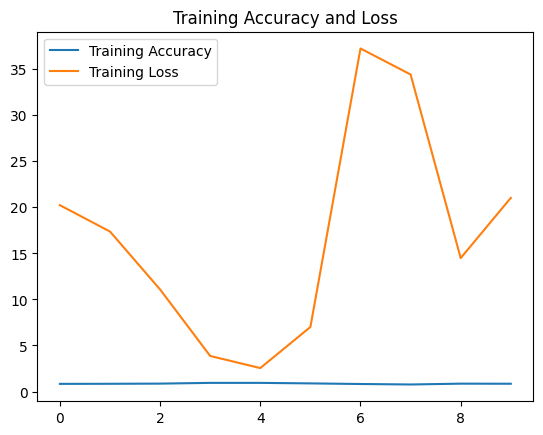

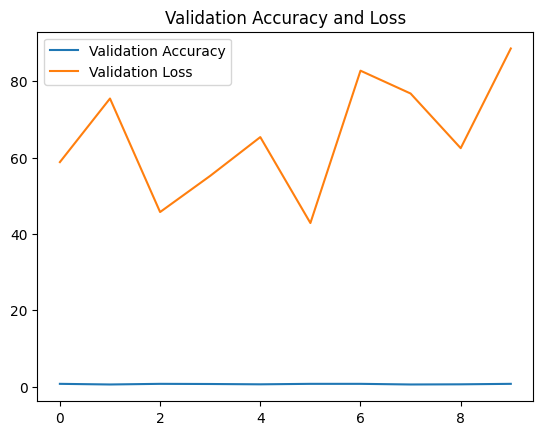

In [498]:
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

In [468]:
if len(y_val.shape) > 1:
    y_true = np.argmax(y_val[:20], axis=1)  # For multi-class (one-hot encoded)
else:
    y_true = y_val[:20]  # For single-class (already in label format)


In [469]:
model.trainable = True  # Assuming you intended to unfreeze your existing 'model'


In [470]:
model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [471]:
print(df.columns)


Index(['Epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')


In [472]:
# Reduce learning rate slightly for fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [473]:
# Check if the generators are yielding data
for batch in train_images_generator:
    print(batch)
    break  # Stop after the first batch

for batch in validation_images_generator:
    print(batch)
    break  # Stop after the first batch

(array([[[[7.46500397e+01, 7.66500397e+01, 7.49501190e+01],
         [7.44775085e+01, 7.64775085e+01, 7.44325256e+01],
         [7.43049774e+01, 7.63049774e+01, 7.39149246e+01],
         ...,
         [1.13014793e+02, 1.11044373e+02, 1.00551765e+02],
         [1.06843010e+02, 1.03358711e+02, 9.33901062e+01],
         [1.15469810e+02, 1.14086182e+02, 1.05624977e+02]],

        [[5.99002495e+01, 6.19002495e+01, 5.95275459e+01],
         [6.36959724e+01, 6.56959686e+01, 6.36683311e+01],
         [6.74916916e+01, 6.94916916e+01, 6.78091202e+01],
         ...,
         [1.12670609e+02, 1.10011833e+02, 9.93471451e+01],
         [1.05122124e+02, 1.01809914e+02, 9.21854858e+01],
         [1.19772034e+02, 1.18904678e+02, 1.10615555e+02]],

        [[3.63787308e+01, 3.76560669e+01, 3.24880753e+01],
         [4.03469849e+01, 4.17968521e+01, 3.71464577e+01],
         [4.43152390e+01, 4.59376411e+01, 4.18048439e+01],
         ...,
         [1.12326431e+02, 1.08979301e+02, 9.81425171e+01],
         

In [512]:
demoImage = preprocess_image(images[120])
show_image(demoImage, '')

NameError: name 'preprocess_image' is not defined

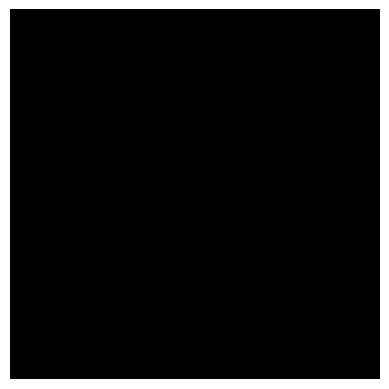

In [476]:
# Normalize the image if necessary (convert to range [0, 1] if not already)
demoImage = tf.squeeze(demoImage)  # Remove unnecessary batch dimensions

# Convert the tensor to a numpy array for visualization
image_to_show = demoImage.numpy()

# If the pixel values are in the range [0, 255], scale them to [0, 1] for display
if image_to_show.max() > 1:
    image_to_show = image_to_show / 255.0

# Show the image using Matplotlib
plt.imshow(image_to_show)
plt.axis('off')  # Turn off axis labels
plt.show()

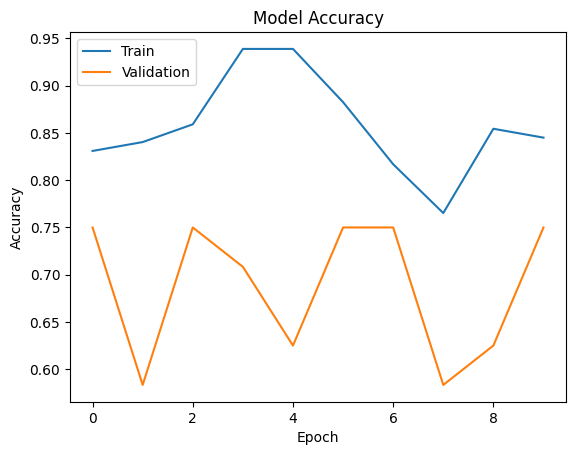

In [499]:
# Assuming 'history' is the variable returned by model.fit()
plt.plot(history.history['accuracy']) # Changed hist to history
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [500]:
# Create an instance of ImageDataGenerator with rescaling and resizing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create an instance of ImageDataGenerator with rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

In [484]:
print("Image shape:", demoImage.shape)


Image shape: (224, 224, 3)


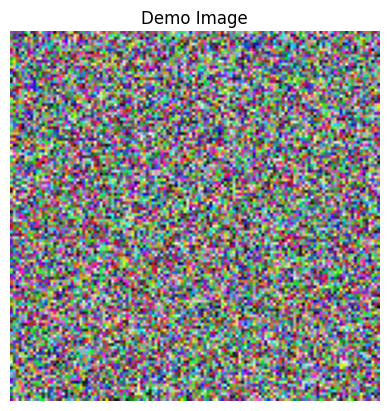

In [485]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming demoImage_resized is already defined and is a TensorFlow tensor

# Check if the image is already normalized to a range [0, 1]
if tf.reduce_max(demoImage_resized).numpy() <= 1.0:
    print("Image pixel values are in the range [0, 1]. Scaling up for visualization...")
    demoImage_resized = demoImage_resized * 255.0  # Scale up pixel values to [0, 255]

# Clip values to ensure they are in the valid range for display
demoImage_resized = tf.clip_by_value(demoImage_resized, 0, 255)

# Convert to uint8 type for proper visualization in matplotlib
demoImage_squeezed = tf.squeeze(demoImage_resized)  # Remove batch dimension if present
demoImage_squeezed_uint8 = tf.cast(demoImage_squeezed, tf.uint8)  # Convert to uint8

# Plot the image
plt.imshow(demoImage_squeezed_uint8)
plt.title('Demo Image')
plt.axis('off')  # Hide axes
plt.show()


Image shape for plotting: (224, 224, 3)


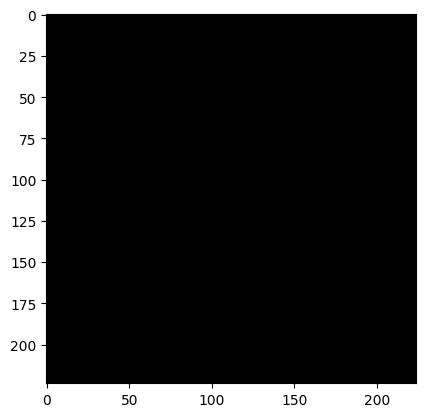

In [486]:
# Check if the image still has a batch dimension (shape like (1, height, width, channels))
# Use tf.squeeze() to remove any batch dimension
demoImage_squeezed = tf.squeeze(demoImage)  # This removes the batch dimension

# Now check the new shape to ensure it's valid for plotting (it should be (128, 128, 3))
print(f"Image shape for plotting: {demoImage_squeezed.shape}")

# Plot the image
plt.imshow(demoImage_squeezed)
plt.show()

In [490]:
# Example: Modify the model's output layer for multi-class classification
from tensorflow.keras import layers, models

# Assuming you have a model definition, modify the last layer like this:
num_classes = 3  # Update this based on the number of classes you have

model = models.Sequential([
    # ... (previous layers)
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [491]:
# Example of a correct output layer for binary classification
from tensorflow.keras.layers import Dense
output_layer = Dense(1, activation='sigmoid')

In [492]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [308]:
print(y_train[0])

0


In [501]:
num_classes = 2  # Update this based on the number of classes you have
# Recreate the model with the necessary layers
model = models.Sequential([
    # ... (previous layers) - Add the layers of your model here
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Run model on the image and get the probability
prediction = model.predict(input_image)[0][0]  # Get the probability

# Classify based on a threshold of 0.5
predicted_class = 1 if prediction >= 0.5 else 0

print(f"Predicted class: {predicted_class}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class: 0


In [502]:
# Run model on the image and get the probability
prediction = model.predict(input_image)[0][0]  # Get the probability

# Classify based on a threshold of 0.5
predicted_class = 1 if prediction >= 0.5 else 0

print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: 0


In [503]:
# Assuming this is a binary classification task
input_image = X_val[0].reshape(1, 128, 128, 3)  # Adjust input shape for the model
prediction = model.predict(input_image, verbose=0)

# Check if prediction is a single probability
print(f"Prediction: {prediction}")

# Access the probability for the positive class (index 0 for sigmoid)
pred_prob = prediction[0][0]

# Convert probability to a binary class (0 or 1)
pred_class = 1 if pred_prob >= 0.5 else 0

# Get the true class label
true_class = y_val[0]  # Assuming labels are 0 or 1

print(f"Predicted class: {pred_class}, True class: {true_class}")

Prediction: [[6.8217204e-13 9.9999797e-01]]
Predicted class: 0, True class: [0. 1.]


In [504]:
# Run the model on the image and get the probability
prediction = model.predict(input_image, verbose=0)

# Check if prediction is a single probability
print(f"Prediction: {prediction}")

# Run model on the image and get the probability
prediction = model.predict(input_image)

# Print the shape of the prediction to understand the output
print(f"Shape of prediction: {prediction.shape}")

# Access the probability for the desired class
# prediction has shape (1,2), so we access the first element
# and then the probability for class 0 or 1 depending on your needs
prediction = prediction[0][0] # Access the probability for class 0

# Convert the probability to a binary class (0 or 1)
predicted_class = 1 if prediction >= 0.5 else 0

# Get the true class label
true_class = y_val[0]  # Assuming y_val contains binary labels (0 or 1)

print(f"Predicted class: {predicted_class}, True class: {true_class}")


Prediction: [[6.8217204e-13 9.9999797e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Shape of prediction: (1, 2)
Predicted class: 0, True class: [0. 1.]


In [505]:
tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))


<Dense name=dense_63, built=False>

In [506]:
demoImage = tf.squeeze(demoImage)  # Remove the extra dimension
demoImage

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00369918, 0.00112891, 0.00077274],
        [0.0036705 , 0.00182069, 0.00089332],
        [0.00362461, 0.00292752, 0.00108625],
        ...,
        [0.00257806, 0.0010372 , 0.00332105],
        [0.00335118, 0.00245697, 0.00323125],
        [0.00383438, 0.00334433, 0.00317512]],

       [[0.00287903, 0.00153335, 0.00101337],
        [0.00309631, 0.00178796, 0.00112152],
        [0.00344395, 0.00219535, 0.00129456],
        ...,
        [0.0018185 , 0.00168046, 0.00244552],
        [0.00279643, 0.00277493, 0.00230677],
        [0.00340763, 0.00345897, 0.00222005]],

       [[0.00156678, 0.00218044, 0.00139837],
        [0.00217759, 0.00173561, 0.00148664],
        [0.00315489, 0.00102387, 0.00162786],
        ...,
        [0.0006032 , 0.00270967, 0.00104468],
        [0.00190883, 0.00328365, 0.00082761],
        [0.00272484, 0.00364239, 0.00069194]],

       ...,

       [[0.00022476, 0.00098738, 0.00173867],
        [0.00

In [507]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting and reduce training time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [508]:
img_size = (128, 128, 3)
basePath = '/content/drive/MyDrive/Colab Notebooks/Project_4/'
img_list = os.listdir(basePath + "Images/")

In [510]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout to prevent overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [511]:
# Resize images to (128, 128) in the ImageDataGenerator
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.3,
    rotation_range=15,
    zoom_range=0.3,
    vertical_flip=True,
    horizontal_flip=True
).flow_from_directory(
    directory='/tmp/input/Images',  # Changed to 'train' directory
    target_size=(128, 128),  # Resize to (128, 128)
    batch_size=32,
    class_mode='binary'
)

validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    directory='/tmp/input/Images',  # Changed to 'validation' directory
    target_size=(128, 128),  # Resize to (128, 128)
    batch_size=32,
    class_mode='binary'

)


Found 237 images belonging to 1 classes.
Found 237 images belonging to 1 classes.


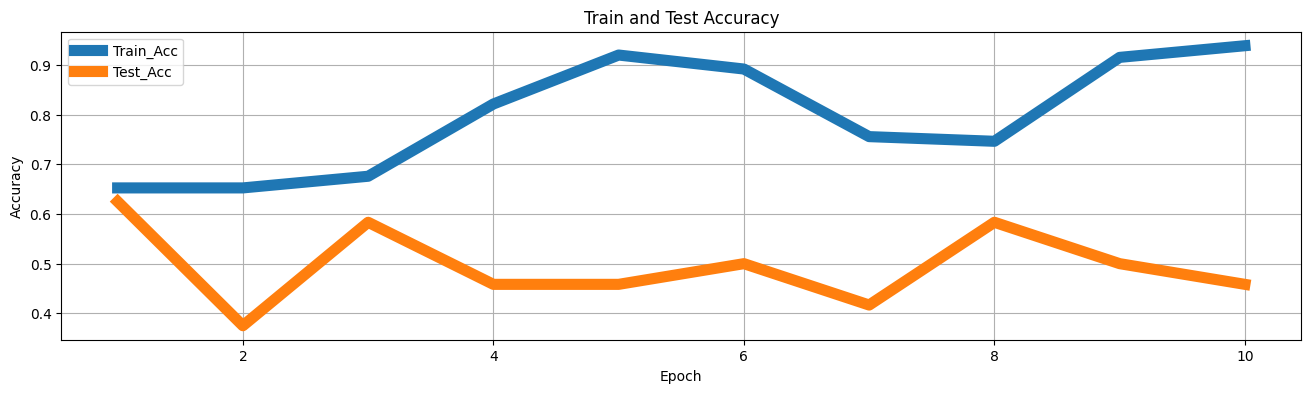

In [525]:
df = pd.DataFrame(fit_model.history)

df.insert(0,'Epoch',[x+1 for x in fit_model.epoch])
df.rename(columns={'accuracy':'Train_Acc','val_accuracy':'Test_Acc'}).plot(
    'Epoch',
     ['Train_Acc','Test_Acc'],
    grid=True,
    ylabel='Accuracy',
    title='Train and Test Accuracy',
    linewidth=8,
    figsize=(16,4));

In [531]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Load a pre-trained object detection model from TensorFlow Hub (SSD with MobileNetV2 trained on COCO)
model_handle = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1"
detector = hub.load(model_handle)

# Set the correct path for the uploaded image
image_path = 'output.png'  # Change this to the correct path of the image

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file at path {image_path} does not exist.")
else:
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Verify if the image was loaded correctly
    if image is None:
        print(f"Error: Failed to load image at {image_path}.")
    else:
        # Convert the image from BGR to RGB and resize for the model
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        image_resized = cv2.resize(image_rgb, (320, 320))  # Resize to 320x320 for the SSD model

        # Add a batch dimension and normalize to [0, 1]
        input_tensor = tf.convert_to_tensor(image_resized, dtype=tf.uint8)
        input_tensor = tf.expand_dims(input_tensor, 0)

        # Run the object detection model
        detections = detector(input_tensor)

        # Extract detection results
        boxes = detections['detection_boxes'][0].numpy()  # Bounding box coordinates
        scores = detections['detection_scores'][0].numpy()  # Confidence scores
        classes = detections['detection_classes'][0].numpy().astype(int)  # Class labels (as integer IDs)

        # Load the COCO labels
        COCO_LABELS = {
            1: "person", 2: "bicycle", 3: "car", 4: "motorcycle", 5: "airplane", 6: "bus", 7: "train", 8: "truck", 9: "boat",
            10: "traffic light", 11: "fire hydrant", 13: "stop sign", 14: "parking meter", 15: "bench", 16: "bird", 17: "cat",
            18: "dog", 19: "horse", 20: "sheep", 21: "cow", 22: "elephant", 23: "bear", 24: "zebra", 25: "giraffe", 27: "backpack",
            28: "umbrella", 31: "handbag", 32: "tie", 33: "suitcase", 34: "frisbee", 35: "skis", 36: "snowboard", 37: "sports ball",
            38: "kite", 39: "baseball bat", 40: "baseball glove", 41: "skateboard", 42: "surfboard", 43: "tennis racket",
            44: "bottle", 46: "wine glass", 47: "cup", 48: "fork", 49: "knife", 50: "spoon", 51: "bowl", 52: "banana", 53: "apple",
            54: "sandwich", 55: "orange", 56: "broccoli", 57: "carrot", 58: "hot dog", 59: "pizza", 60: "donut", 61: "cake",
            62: "chair", 63: "couch", 64: "potted plant", 65: "bed", 67: "dining table", 70: "toilet", 72: "TV", 73: "laptop",
            74: "mouse", 75: "remote", 76: "keyboard", 77: "cell phone", 78: "microwave", 79: "oven", 80: "toaster", 81: "sink",
            82: "refrigerator", 84: "book", 85: "clock", 86: "vase", 87: "scissors", 88: "teddy bear", 89: "hair drier", 90: "toothbrush"
        }

        # Filter detections with a confidence score above 0.5
        filtered_boxes = boxes[scores > 0.5]
        filtered_scores = scores[scores > 0.5]
        filtered_classes = classes[scores > 0.5]

        # Display the image with bounding boxes and labels
        plt.figure(figsize=(10, 10))
        plt.imshow(image_rgb)

        for i, box in enumerate(filtered_boxes):
            y_min, x_min, y_max, x_max = box
            (left, right, top, bottom) = (x_min * image.shape[1], x_max * image.shape[1], y_min * image.shape[0], y_max * image.shape[0])

            # Draw the bounding box
            plt.gca().add_patch(plt.Rectangle((left, top), right-left, bottom-top, edgecolor='red', linewidth=2, fill=False))

            # Add the class label and confidence score
            class_label = COCO_LABELS.get(filtered_classes[i], 'N/A')
            plt.text(left, top - 10, f'{class_label}: {filtered_scores[i]:.2f}', color='red', fontsize=12)

        plt.axis('off')
        plt.show()

        # List the detected objects
        for i, class_id in enumerate(filtered_classes):
            class_label = COCO_LABELS.get(class_id, 'N/A')
            print(f'Object {i+1}: {class_label} (Confidence: {filtered_scores[i]:.2f})')


Error: The file at path output.png does not exist.


# Sources

- https://www.kaggle.com/code/crn4tww/clean-dirty-road-classification-accuracy-100
- https://www.kaggle.com/datasets/faizalkarim/cleandirty-road-classification
- https://www.kaggle.com/code/paultimothymooney/mobilenetv2-with-tensorflow